In [16]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import scale
import random

print('seaborn: {}'.format (seaborn.__version__))

seaborn: 0.8.0


In [4]:
ls

creditcard.csv        frauddetection.ipynb


In [17]:
import seaborn as sns

In [5]:
df = pd.read_csv('creditcard.csv', low_memory=False)
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,119017.0,2.065247,-0.044042,-1.069423,0.411395,-0.130614,-1.203759,0.186567,-0.336592,0.535159,...,-0.290314,-0.697515,0.338388,0.022324,-0.294170,0.196878,-0.070255,-0.060153,0.89,0
1,10647.0,-2.227333,-1.632325,2.444756,0.569288,1.757615,-1.361787,0.056577,-0.899850,1.929848,...,-0.506358,0.027204,0.088108,0.497155,0.348283,1.136735,-0.608921,-0.451512,24.50,0
2,170501.0,-0.307632,-0.502418,0.412623,-2.379532,-1.024852,-1.029202,-0.624273,0.299023,-2.080532,...,-0.078578,-0.046631,-0.058581,-0.058174,0.079396,-0.148336,-0.120278,-0.128705,20.00,0
3,64833.0,-0.755946,1.320424,1.909371,2.953283,0.224164,-0.212682,0.949370,-0.409714,-0.422467,...,-0.237610,0.169422,-0.032514,0.731827,-0.175677,0.136601,0.292079,-0.069192,11.05,0
4,158550.0,2.032502,-0.014958,-0.881146,0.512393,-0.319532,-1.447267,0.216898,-0.381291,0.461422,...,-0.257540,-0.593837,0.388128,0.469026,-0.343297,0.168630,-0.068005,-0.054902,1.98,0


In [6]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


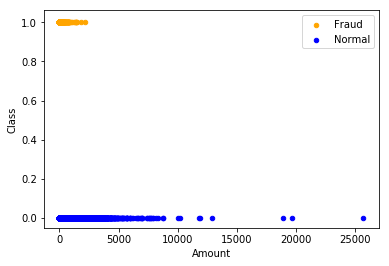

In [8]:
ax = fraud.plot.scatter(x='Amount', y = 'Class', color= 'Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y = 'Class', color= 'Blue', label='Normal', ax = ax)
plt.show()

In [19]:
print (df.shape)

(284807, 31)


In [20]:
data = df.sample(frac=0.1, random_state = 1)
print(data.shape)

(28481, 31)


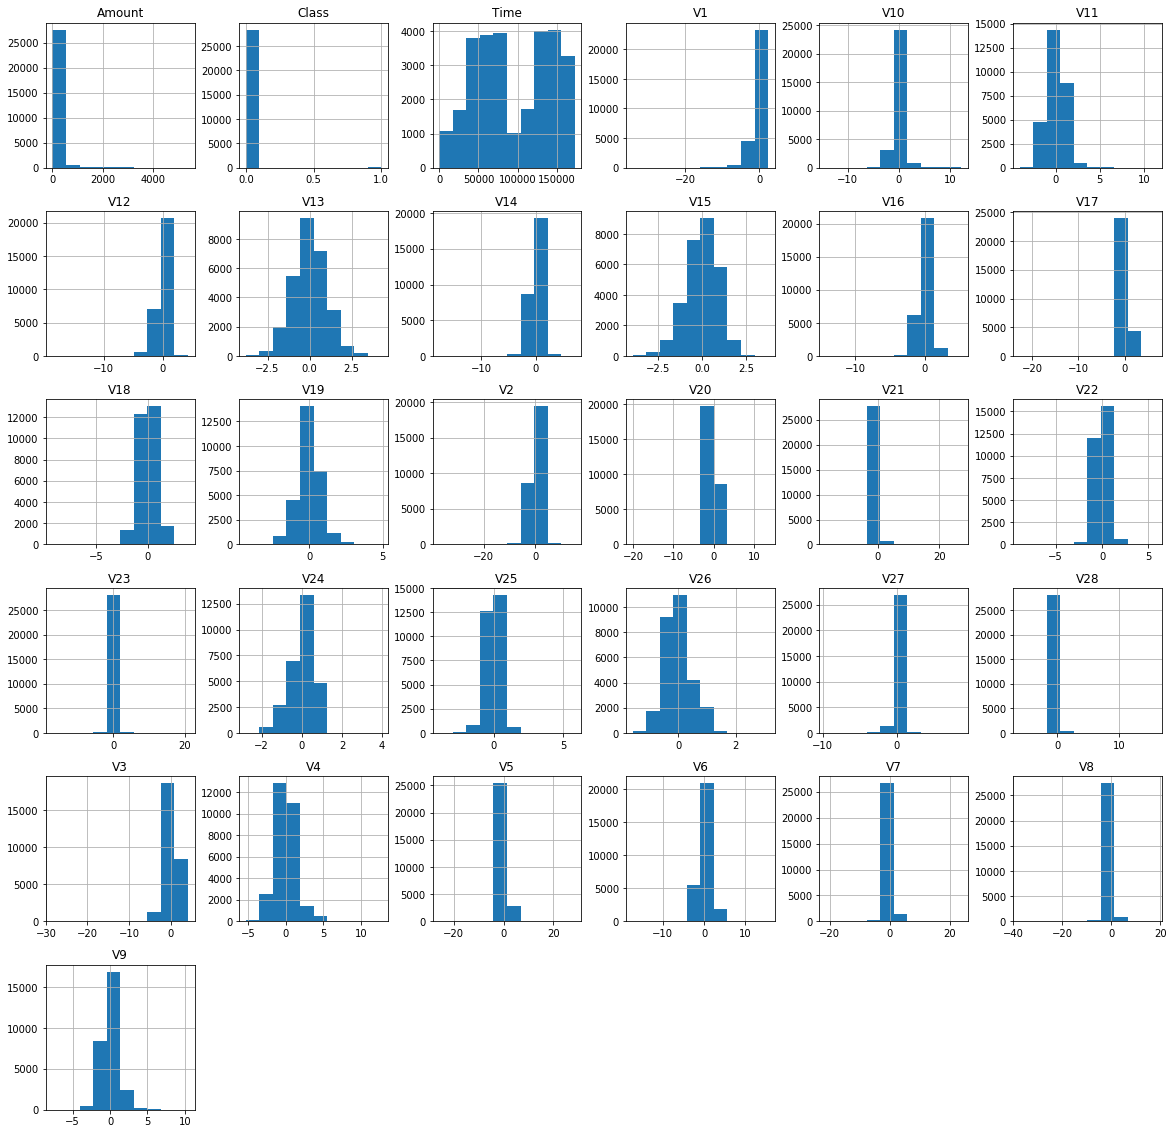

In [21]:
#plot a histogram
data.hist(figsize=(20,20))
plt.show()

In [23]:
#determine number of fraud transaction in databases
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

outlier_fraction = len(fraud) / float(len(valid))
print(outlier_fraction)

print('fraud cases:{}'.format(len(fraud)))
print('valid cases:{}'.format(len(valid)))

0.0017938797045374604
fraud cases:51
valid cases:28430


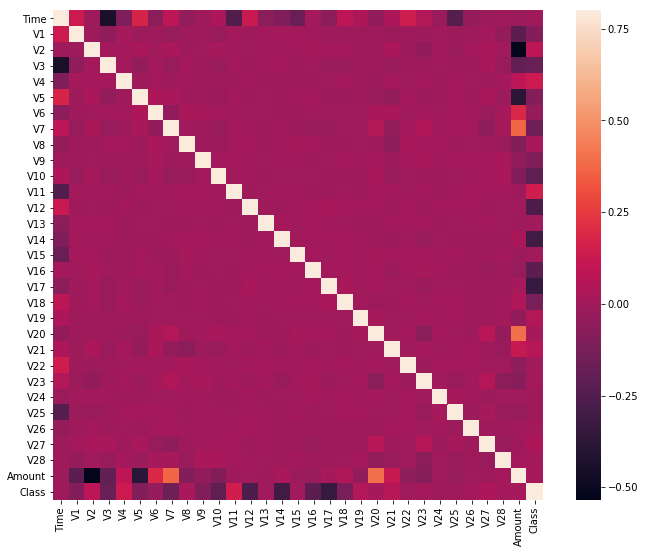

In [24]:
#correlation Matrix
cormat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(cormat, vmax= .8, square = True)
plt.show()


In [10]:
#time for machine learning

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [11]:
x = df.iloc[:, :-1]
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.35)

In [12]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(x_train, y_train)
print('Score:', logistic.score(x_test, y_test))

/Users/petrbulkhak/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.999217519537


In [13]:
y_predicted = np.array(logistic.predict(x_test))
print(y_predicted)

[0 0 0 ..., 0 0 0]
